In [1]:
using Plots

In [2]:
function frag_vec(n, dt,  fragmentation_timescale, mode)
    
    fragmentation_mode = ones(n)
    frag_prob = exp(-abs(dt)/(fragmentation_timescale))
    frag_prob = ones(n)*frag_prob
    rnd_num = rand(n)
    
    truth = rnd_num  .> frag_prob
    
    if mode == "rand"
        fragmentation_mode = rand(n).*truth + .!truth
        
    elseif mode == "Mika"
        raw_mode = rand([8, 4, 2, 1], n) #p=np.array([8/14.5, 4/14.5, 2/14.5, 0.5/14.5])) # FIX this!!
        fragmentation_mode = 1 ./raw_mode.*truth + .!truth
    
    end
    
    return fragmentation_mode
end

frag_vec (generic function with 1 method)

In [3]:
a = frag_vec(10, 0.1, 100, "Mika")

10-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [4]:
function sinkingVelocity(radius, β, ν)
    alpha = radius
    g = 9.81
  
    tau_p = alpha.^2/(3*β*ν)
    
    v_s = (1 - β)*g*tau_p
    
    return v_s
    
end

sinkingVelocity (generic function with 1 method)

In [4]:
sinkingVelocity([1,1,1], 0.8, 1e-6)*.1

3-element Vector{Float64}:
 81749.99999999999
 81749.99999999999
 81749.99999999999

In [14]:
# parameters
r = 5e-5 # 100nm
k = 0
sim_time = 1000 #365*10
N = sim_time + 1
V = 4/3 *π*r^3

frag_timescale = 1000

particles = 10000
initial_depth = 5000
depth_lim = 0000
diameter_lim = 1e-3
β = 0.8
ν = 1e-6


time = LinRange(0, sim_time, N)
dt = time[2] - time[1]

lengthxx = zeros(particles)
depthxx = zeros(particles) .+ initial_depth
agexx = zeros(particles)

lengthxx[:] .= r
online = sum(depthxx .> depth_lim)

i = 0
while online != 0
    truth = depthxx .> depth_lim
    length_lim = lengthxx .< diameter_lim
    
    depthxx = depthxx - sinkingVelocity(lengthxx, β, ν)*dt.*truth
    modexx = frag_vec(particles, dt, frag_timescale, "Mika")
    lengthxx = lengthxx.*(1 .+ (1 ./modexx .- 1).*length_lim)
    agexx = agexx + 1 .*truth
    online = sum(truth)
    i += 1
end

In [7]:
agexx

10000-element Vector{Float64}:
 28049.0
  6591.0
 10215.0
 20158.0
 17088.0
 67712.0
 11369.0
 23328.0
 14532.0
 14038.0
 16145.0
 15401.0
 19986.0
     ⋮
  4262.0
 21093.0
 30110.0
 10432.0
 15558.0
  4428.0
 12066.0
 20218.0
  8877.0
 17557.0
 17264.0
  4220.0

In [15]:
using Statistics

In [16]:
mean(agexx)

5124.8075

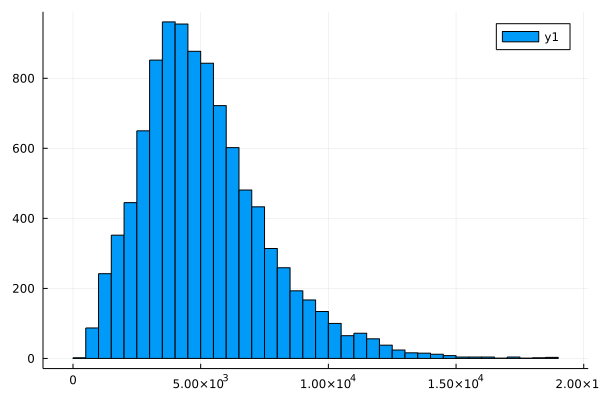

In [17]:
histogram(agexx)


In [ ]:
Stati

In [13]:
? mean

search: weighted_color_mean SegmentationFault macroexpand @macroexpand

Couldn't find mean
Perhaps you meant map, max, min, atan, read, real, tan, Real, Meta or merge


No documentation found.

Binding `mean` does not exist.


In [ ]:
plot()

In [10]:
maximum(agexx)

77093.0

In [9]:
minimum(agexx)

150.0

In [153]:
LinRange(0, 10, 1000) 

1000-element LinRange{Float64, Int64}:
 0.0,0.01001,0.02002,0.03003,0.04004,…,9.95996,9.96997,9.97998,9.98999,10.0